In [1]:
import os

In [2]:
files = []
#extracting the data from the folders
folders = (os.listdir("20_newsgroups"))
x = []
y =[]
#creating the datalist by storing the class name in y in all the text in x
for i in folders : 
    fld=os.listdir(os.path.join("20_newsgroups", i))
    for j in fld:
        f = open(os.path.join("20_newsgroups", i ,j), "r",encoding='latin-1')
        x.append(f.read())
        y.append(i)
        f.close()



In [3]:
#All the current data is in the form of strings so breaking it down into array where each element of array
#contains each seperate word.
x_ = []#it will be a 2D array containing every  text file which is stroed in an array(hence 2D)
for i in range(len(x)):
    
    x_.append(x[i].split())#adding the words after splitting
    
    x_[i] = [t.lower() for t in x_[i]]#converting all the words to lowercase so as to avoid complications
    
#List of stop words which we need to avoid while making our dictionary    
stopwords = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all","all.", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred","so,","so.", "ie", "if", "in", "inc","we,","we." "indeed", "interest", "into", "is", "it","i", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me","me.", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than","not.","not,","no.","no," ,"that","that.","this.", "the","this,", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore","therefore," "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

In [4]:
#A function to check whether a particular key is present or not
def checkKey(dict, key): 
      
    if key in dict:
        return True
    else:
        return False


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_,y,random_state = 0)#splitting our given data

In [30]:
len(x_test)#for testing purpose only(no significance in the code)

5000

In [8]:
#Now we are creating the dictionary here
dict = {}
for i in range(len(x_train)):#iterating over each document
    
    for j in range(len(x_train[i])):#iterating over each word of the document
        
        if x_train[i][j] not in stopwords:#checking whether it is a stopword or not
            
            if checkKey(dict,x_train[i][j]):#checking if the curr word is already present in dict
                dict[x_train[i][j]]+=1#if it is present then simply inc the freq
            
            #else we need to create a new key of that particular word with freq 1
            else:
                dict[x_train[i][j]] = 1
                
    

In [9]:
#Sorting our given data in decreasing order so that we can find out the cutoff value of the words in dict.
#using sorted function returns a tuple for every key,value pair in the map
my_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)
# my_dict

In [10]:
import matplotlib.pyplot as plt
x_axis = []
y_axis = []
#Now plotting the graph so as to find the cutoff point
count = 0

#Here I am iterating from 5000 because starting from 0 gave a very sharp change
#and finding the optimal cutoff was getting difficult due to it

for i   in range(5000,len(my_dict)):
    x_axis.append(i)
    
    y_axis.append(my_dict[i][1])
    count+=1

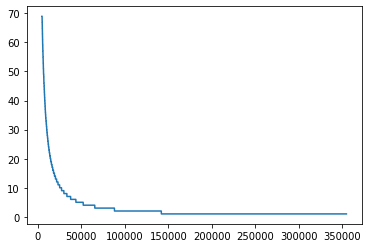

In [11]:
#Displaying the graph
plt.plot(x_axis,y_axis)
plt.show()

In [12]:
#so from  the graph it seems that a our cutoff value should be around 10000
import pandas as pd
import numpy as np

In [13]:
#Making a list of all the features(words) which are there after choosing the top frequency words
feature_names = []
for i in range(10000):
    feature_names.append(my_dict[i][0])
len(feature_names)

10000

In [14]:
y_train = np.array(y_train)#converting the y_train from list to numpy array

In [15]:
#Now making the training data into the 2D array form which we can analyize the data

data_x = np.zeros(14997*10000)#Taking all values to be 0 initially

data_x = data_x.reshape(14997,10000)#reshaping it in the form of a 2D array
data_x.shape

(14997, 10000)

In [16]:
#Now filling the training data which we just created
for i in range(len(x_train)): #iterating ove every document
    
    for j in range(len(x_train[i])):#iterating ove every word of the current document
        
        for k in range(10000):#iterating over the feature set of the top words
            
            if x_train[i][j] == feature_names[k]: #checking if the particular word is in the feature list
                
                data_x[i][k]+=1#if yes increment the freq by 1
                continue

In [17]:
data_x#testing 

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [3., 1., 1., ..., 0., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       [2., 1., 1., ..., 0., 0., 0.]])

In [18]:
type(y_train)#testing

numpy.ndarray

In [19]:
#Now training over the given data
#This function returns a dictionary.
def train(X_train,Y_train):
    
    count = {}#The dictionary that we will finally return 
    all_classes = set(Y_train)#finding all unique values in y_train
                               #this will be the total classes available 
    
    for curr_class in all_classes:#iterating over each class
        
        curr_class_rows = (Y_train == curr_class)
        x_curr = X_train[curr_class_rows]#the x_train with all of them having o/p as curr_clas
        y_curr = Y_train[curr_class_rows]
        count[curr_class] = {}#creating another dictionary of features in the current class
        ans = 0
        
        for j in range(10000):#iterating over all the features
            count[curr_class][j] = x_curr[:,j].sum()
            ans+= x_curr[:,j].sum()
            
        count[curr_class]["total"] = ans#finally storing the total for the curr class
                                        #we will use this when will calculate the probability later
        
    return count

In [20]:
count_dict = train(data_x,y_train)
# count_dict #the dictionary we got after training

In [21]:
import math as m

In [22]:
#function calculating the prob
def probability(word,dict,curr_class):
    
    
    #No. of features in the curr_class(-1 is done as it also contains "total")
    k = len(dict[curr_class].keys()) - 1 
    
    total_curr_class = m.log(dict[curr_class]["total"] +k) #total in curr class
    freq_word_curr = m.log(dict[curr_class][word] +1) #freq of curr word in that class
    ans = freq_word_curr - total_curr_class #equivalent to dividing the 2 as we have taken the log
    return ans

In [23]:
#predicting for every document of the testing data 
def predict_one(x,dict):
    
    classes = (dict.keys())
    max_class = ""
    max_ans = -10000
    for curr_class in classes:#loop over all classes
        ans = 0
        for i in range(len(x)):#iterating over each word
            
            #checking if it is presnt in the feature list then only we calculate the prob.
            if x[i] in feature_names: 
                
                #getting the index of that particular element from the feature set 
                 #that we created as we have used the same numbering in the dictionary as well
               
                index = feature_names.index(x[i])
                
                #equivalent to multiplying as the results are logarithmic
                ans+=probability(index,dict,curr_class)
                
        if ans>=max_ans: #checking if it is the max so far
            max_ans = ans
            max_class = curr_class
    
    return max_class

In [24]:
#the predict function that we will be using
#it will return an array havin all the values of predictions over every test data
def predict(x_test, dict):
    output = []
    for i in range(len(x_test)):#iterating over each test document
        
        ans = predict_one(x_test[i],dict)#adding the ans to u=our final list
        output.append(ans)
        
    return output

In [25]:
#here we have the predicitions
y_pred = predict(x_test,count_dict)

In [26]:
y_pred[0]#testing 

'comp.windows.x'

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\Users\KSHITIJ ANAND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                               0.00      0.00      0.00         0
             alt.atheism       0.74      0.79      0.77       233
           comp.graphics       0.77      0.80      0.78       253
 comp.os.ms-windows.misc       0.81      0.86      0.83       249
comp.sys.ibm.pc.hardware       0.79      0.88      0.83       240
   comp.sys.mac.hardware       0.85      0.92      0.88       236
          comp.windows.x       0.94      0.81      0.87       240
            misc.forsale       0.83      0.84      0.83       261
               rec.autos       0.88      0.93      0.90       269
         rec.motorcycles       0.89      0.96      0.92       284
      rec.sport.baseball       0.94      0.94      0.94       248
        rec.sport.hockey       0.96      0.93      0.94       231
               sci.crypt       0.96      0.92      0.94       233
         sci.electronics       0.87      0.89      0.88       244
         

In [28]:
from sklearn.naive_bayes import MultinomialNB 

In [29]:
#Now from here we are using the inbuilt multinomial classifier for verifying our results
clf = MultinomialNB()
clf.fit(data_x,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
#since the inbuilt classifier needs test_data in the same form as the training data
#we need to convert it into that form
data_x_test = np.zeros(5000*10000)
data_x_test = data_x_test.reshape(5000,10000)
data_x_test[0].shape
for i in range(len(x_test)):
    for j in range(len(x_test[i])):
        for k in range(8000):
            if x_test[i][j] == feature_names[k]:
                data_x_test[i][k]+=1
                continue

In [33]:
#Now comparing our results from that of inbuilt classifer
y_pred_internal = clf.predict(data_x_test)
print(classification_report(y_pred_internal,y_pred))
print(confusion_matrix(y_pred_internal,y_pred))


C:\Users\KSHITIJ ANAND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                               0.00      0.00      0.00         0
             alt.atheism       0.98      0.97      0.98       251
           comp.graphics       0.95      0.96      0.95       260
 comp.os.ms-windows.misc       0.96      0.96      0.96       264
comp.sys.ibm.pc.hardware       0.98      0.95      0.96       275
   comp.sys.mac.hardware       0.99      0.97      0.98       259
          comp.windows.x       0.99      0.96      0.97       213
            misc.forsale       0.97      0.98      0.98       262
               rec.autos       0.99      0.98      0.98       285
         rec.motorcycles       0.98      0.99      0.98       304
      rec.sport.baseball       0.98      0.99      0.99       247
        rec.sport.hockey       0.99      1.00      0.99       222
               sci.crypt       1.00      0.99      0.99       226
         sci.electronics       0.98      0.96      0.97       253
         

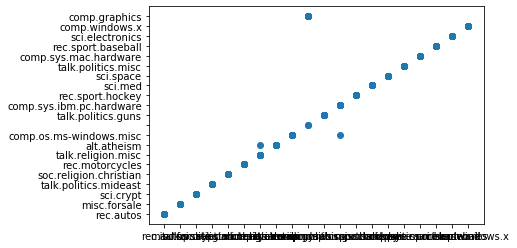

In [75]:
#just plotting to see how well our classifer is performing wrt to the inbuilt. 
plt.scatter(y_pred_internal,y_pred)
plt.show()

In [34]:
from sklearn.metrics import accuracy_score


In [36]:
accuracy_score(y_test,y_pred)

0.975